In [ ]:
!git clone https://github.com/Bhavnoor-Coders-1010/food101


Cloning into 'food101'...
remote: Enumerating objects: 6220, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 6220 (delta 1), reused 16 (delta 1), pack-reused 6200 (from 4)
Receiving objects: 100% (6220/6220), 169.23 MiB | 16.63 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (6256/6256), done.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications import VGG16

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

train_df = pd.read_csv('food101/DataFOOD101/train.csv')
test_df = pd.read_csv('food101/DataFOOD101/test.csv')

image_folder_train = 'food101/DataFOOD101/Train/'
image_folder_test = 'food101/DataFOOD101/Test/'

train_images_resized = []
train_labels = []

oh = OneHotEncoder()

for image_name in os.listdir(image_folder_train):
    image_path = os.path.join(image_folder_train, image_name)
    matching_row = train_df[train_df['imagePath'] == image_name]

    label = matching_row.iloc[0]['label']
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (172,172))
    train_images_resized.append(resized_img)
    train_labels.append(label)

X_train = np.array(train_images_resized)
y_train = np.array(train_labels)

test_images_resized = []
test_labels = []

for image_name in os.listdir(image_folder_test):
    image_path = os.path.join(image_folder_test, image_name)

    matching_row = test_df[test_df['imagePath'] == image_name]


    label = matching_row.iloc[0]['label']
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (172, 172))
    test_images_resized.append(resized_img)
    test_labels.append(label)

X_test = np.array(test_images_resized)
y_test = np.array(test_labels)

y_test_encoded = oh.fit_transform(y_test.reshape(-1, 1)).toarray()

# to save RAM
del train_images_resized
del train_labels
print(X_train.shape)
print(X_test.shape, y_test_encoded.shape)
print(y_train.shape,y_test.shape)

(5314, 172, 172, 3)
(939, 172, 172, 3) (939, 20)
(5314,) (939,)


In [ ]:
n_validation = len(X_train) // 5

X_validation = X_train[-n_validation:]
y_validation = y_train[-n_validation:]

X_train = X_train[:-n_validation]
y_train = y_train[:-n_validation]

y_train_encoded=oh.fit_transform(y_train.reshape(-1,1)).toarray()
new_yval = oh.fit_transform(y_validation.reshape(-1, 1)).toarray()

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(172, 172, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(units=20, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
X_train = X_train / 255.0
X_validation = X_validation / 255.0

n_epochs=10
batch_size=32



In [ ]:
history = model.fit(X_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    validation_data=(X_validation, new_yval))

Epoch 1/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 48s 251ms/step - accuracy: 0.3396 - loss: 2.4359 - val_accuracy: 0.5009 - val_loss: 2.0569
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 53s 123ms/step - accuracy: 0.7076 - loss: 0.9995 - val_accuracy: 0.6441 - val_loss: 1.3925
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.7950 - loss: 0.7058 - val_accuracy: 0.6770 - val_loss: 1.1283
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - accuracy: 0.8470 - loss: 0.5424 - val_accuracy: 0.6864 - val_loss: 1.0543
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.8705 - loss: 0.4362 - val_accuracy: 0.6714 - val_loss: 1.0682
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.8952 - loss: 0.3621 - val_accuracy: 0.6864 - val_loss: 1.0815
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.9222 - loss: 0.2845 - val_accuracy: 0.6911 - val_loss: 1.1120
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.9336 - loss: 0

In [ ]:
import tensorflow as tf
base_model.trainable = True

for layer in base_model.layers[:8]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(X_train, y_train_encoded,
                             batch_size=batch_size,
                             epochs=5,
                             validation_data=(X_validation, new_yval))


Epoch 1/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 69s 370ms/step - accuracy: 0.9565 - loss: 0.1534 - val_accuracy: 0.7119 - val_loss: 1.1722
Epoch 2/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 33s 248ms/step - accuracy: 0.9820 - loss: 0.0893 - val_accuracy: 0.7137 - val_loss: 1.1164
Epoch 3/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - accuracy: 0.9915 - loss: 0.0582 - val_accuracy: 0.7213 - val_loss: 1.0535
Epoch 4/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 31s 234ms/step - accuracy: 0.9956 - loss: 0.0453 - val_accuracy: 0.7222 - val_loss: 1.0271
Epoch 5/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 41s 237ms/step - accuracy: 0.9978 - loss: 0.0334 - val_accuracy: 0.7382 - val_loss: 1.0005


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.7336 - loss: 0.9846
Loss =  0.953058123588562
Accuracy =  74.76038336753845 %


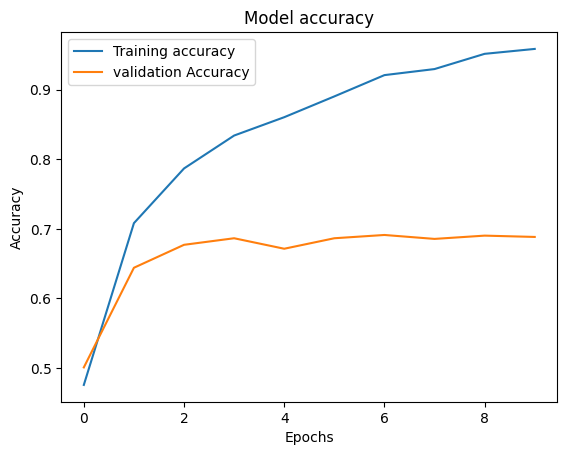

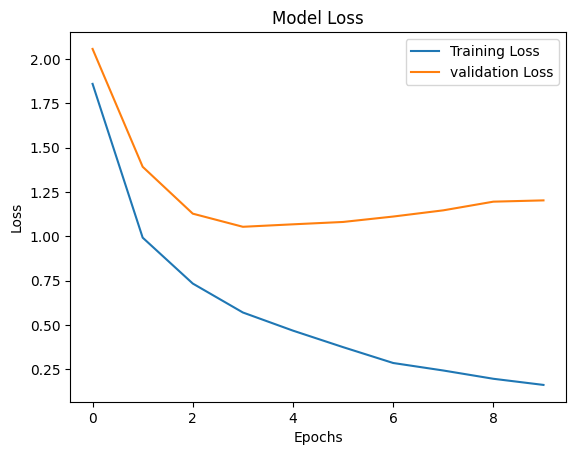

In [ ]:
X_test_normalized = X_test / 255.0
results = model.evaluate(X_test_normalized, y_test_encoded)

print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss....
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 172, 172, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 172, 172, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 172, 172, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 86, 86, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 86, 86, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 86, 86, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 43, 43, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 43, 43, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 43, 43, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 43, 43, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 21, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 21, 21, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 21, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 21, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,159,360 (54.01 MB)

 Non-trainable params: 555,328 (2.12 MB)

In [ ]:
model.save("model.keras")